In [1]:
### This code is to simulate the probability of the final outcome of a 2-strain system
### The final outcome of a 2-strain system is based on pairwise invasion fitnesses
import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

In [3]:
#create main parameters
def parameters(n,mu):
    # Perturbations:
    #b = 0.5*(np.random.rand(n)) - 1 #in transmission rate
    b = np.zeros((n,1))
    
    #nu1d = 0.5*np.random.rand(n) - 1 #in singled-infection clearance rate
    nu1d = np.zeros((n,1))
    
    #nu2d = 0.5*np.random.rand(n, n) - 1 # in doubled-infection clearance rate
    nu2d = np.zeros((n,n))
    
    #omega = 0.5*np.random.rand(n, n) - 1 # in transmission probability from a co-colonized host
    omega = np.zeros((n,n))
    
    alp = 0.5*np.random.rand(n, n) - 1 # in cocolonization interaction
    #alp = np.zeros((n,n))
    
    R0 = 1/(k*mu) + 1
    beta = R0*m
    
    #k = 1/(mu*(R0 - 1)) # cocolonization interaction coefficient
    #stable state values: S*, T*, I*, J* and determinant of matrix
    S_star = m/beta
    T_star = 1 - S_star
    I_star = m*T_star/(m + beta*k*T_star)
    J_star = T_star - I_star
    detP = 2*(T_star)**2 - I_star*J_star
    
    #coefficients for replicator equations: theta 1,2,3,4,5
    teth1 = 2*beta*S_star*(T_star)**2/detP
    teth2 = gamm*I_star*(I_star + T_star)/detP
    teth3 = gamm*T_star*J_star/detP
    teth4 = 2*m*T_star*J_star/detP
    teth5 = beta*T_star*I_star*J_star/detP
    return b, nu1d, nu2d, omega, alp, teth1, teth2, teth3, teth4, teth5

### Compute the pairwise invasion fitness matrix
def fitness(**kwargs):
    lambd = np.zeros((n,n))
    for i in range (0,n):
        for j in range (0,n):
            lambd[i][j] = teth1*(b[i]-b[j]) + teth2*(-nu1d[i] + nu1d[j]) + teth3*(-nu2d[i][j]-nu2d[j][i]+2*nu2d[j][j]) + teth4*(omega[i][j] - omega[j][i])+ teth5*(mu*(alp[j][i] - alp[i][j]) + alp[j][i] - alp[j][j])
    return lambd

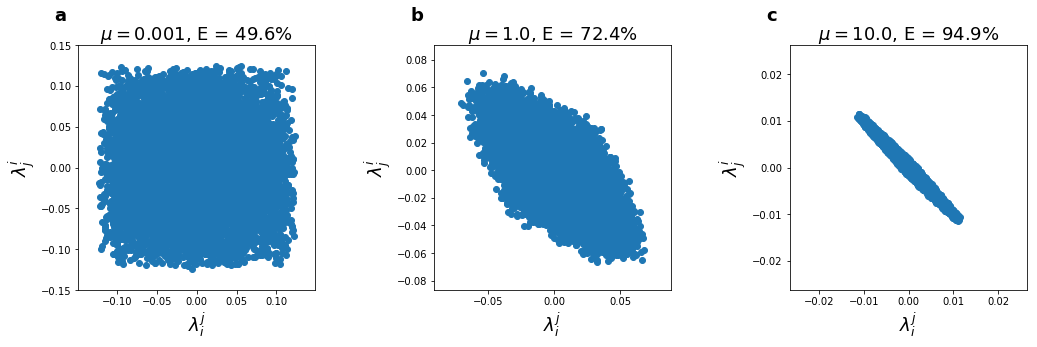

In [6]:
n = 150 # system with 100 strains
#m, beta, b, k settings
m = 1.5 # clearance rate + mortality/recruitment rate
gamm = 1.2 # clearance rate
k = 3 # k: cocolonization interaction coefficient- computed in parameters(n,mu)
#beta: transmission rate

    
#if gamm > m:
#    temp1 = m
#    m = gamm
#    gamm = temp1 #make sure that r = m - gamma > 0
#     if m > beta:
#         temp2 = m
#         m = beta
#         beta = temp2 #make sure that m < beta

fig_x = []
fig_y = []
prob = []

value_mu = np.array([0.001, 1, 10]) #mu values
sample = n*(n-1)/2

for mu in value_mu:
    count = 0
    b, nu1d, nu2d, omega, alp, teth1, teth2, teth3, teth4, teth5 = parameters(n,mu)
    lambd = fitness()
    L_inv, L_res = [], [] # invasion & resident 's fitnesses
    for i in range (0, n):
        for j in range (i+1, n):
            L_inv.append(lambd[i][j]) 
            L_res.append(lambd[j][i])
            
            if lambd[i][j]*lambd[j][i] < 0:
                count = count + 1
    p = np.around(count/sample*100,1)
    
    fig_x.append(L_inv)
    fig_y.append(L_res)

    prob.append(p)
    
fig, ax = plt.subplots(1, 3, figsize=(17, 4.5))
fig.subplots_adjust(wspace = 0.5)
order = np.array(['a', 'b', 'c'])

for i in range (0, 3):
    ax[i].scatter(fig_x[i], fig_y[i])
    ax[i].set_xlabel('$\\lambda^j_i$', fontsize = 18)
    ax[i].set_ylabel('$\\lambda^i_j$', fontsize = 18)
    ax[i].set_title('$\\mu = {}$, E = {}%'.format(value_mu[i],prob[i]), fontsize = 18)
    ax[i].text(-0.1, 1.1, '{}'.format(order[i]), transform=ax[i].transAxes, size=18, weight='bold')
    
plt.show()
